In [1]:
install.packages("citationchaser")
install.packages("igraph")



The downloaded binary packages are in
	/var/folders/h3/t97dnr1d7wsgh8lhwvb3g0r80000gp/T//RtmpgGHA1r/downloaded_packages

The downloaded binary packages are in
	/var/folders/h3/t97dnr1d7wsgh8lhwvb3g0r80000gp/T//RtmpgGHA1r/downloaded_packages


In [3]:
library(citationchaser)
library(igraph)

# Define the DOI of the paper you're interested in
article_list <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the forward citations (papers that cite your paper of interest)
forward_citations <- get_refs(article_list, get_records = 'citations', token = token)

# Fetch the backward citations (papers that your paper of interest cites)
backward_citations <- get_refs(article_list, get_records = 'references', token = token)

# Combine the citations
# Note: You might need to adjust this part based on the structure of the data returned by get_refs
all_citations <- rbind(forward_citations, backward_citations)

# Create a data frame for edges
edges <- data.frame(from = rep(article_list, length(all_citations)), to = all_citations)

# Create an igraph object
g <- graph_from_data_frame(edges, directed = TRUE)

# Export the network to a format that Gephi can read
write_graph(g, file = "citation_network.graphml", format = "graphml")

cat("Network file 'citation_network.graphml' has been generated!")


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Seeking citations..."
[1] "Citations per record sought:"
[1] 21168
[1] "Total citations sought:"
[1] 21168
[1] "Citations record list: "
    [1] "000-002-367-635-635" "000-009-521-444-696" "000-010-638-209-92X"
    [4] "000-017-713-817-442" "000-020-966-542-974" "000-024-364-999-22X"
    [7] "000-025-110-836-978" "000-031-513-758-135" "000-035-455-456-742"
   [10] "000-037-376-902-811" "000-051-707-082-100" "000-062-221-974-081"
   [13] "000-065-406-715-83X" "000-073-174-709-050" "000-080-610-253-957"
   [16] "000-087-405-267-542" "000-092-022-873-461" "000-096-609-628-535"
   [19] "000-101-066-844-55X" "000

Warning message in data.frame(from = rep(article_list, length(all_citations)), to = all_citations):
"row names were found from a short variable and have been discarded"


Network file 'citation_network.graphml' has been generated!

In [7]:
#class(backward_citations)
str(backward_citations)


List of 4
 $ display:Classes 'data.table' and 'data.frame':	35 obs. of  9 variables:
  ..$ authors     : chr [1:35] "Everingham, Mark; Eslami, S. M.; Van Gool, Luc; Williams, Christopher; Winn, John; Zisserman, Andrew" "Felzenszwalb, Pedro F.; Girshick, Ross; McAllester, David; Ramanan, Deva" "Szegedy, Christian; Liu, Wei; Jia, Yangqing; Sermanet, Pierre; Reed, Scott; Anguelov, Dragomir; Erhan, Dumitru;"| __truncated__ "Uijlings, Jasper; van de Sande, Koen E. A.; Gevers, Theo; Smeulders, Arnold W. M." ...
  ..$ year        : int [1:35] 2014 2010 2014 2013 2013 NA 2015 NA 2009 2012 ...
  ..$ title       : chr [1:35] "The Pascal Visual Object Classes Challenge: A Retrospective" "Object Detection with Discriminatively Trained Part-Based Models" "Going Deeper with Convolutions" "Selective Search for Object Recognition" ...
  ..$ source_title: chr [1:35] "International Journal of Computer Vision" "IEEE transactions on pattern analysis and machine intelligence" "arXiv: Computer Vision and Pa

Warning message in graph_from_data_frame(edges, directed = TRUE):
"In `d' `NA' elements were replaced with string "NA""


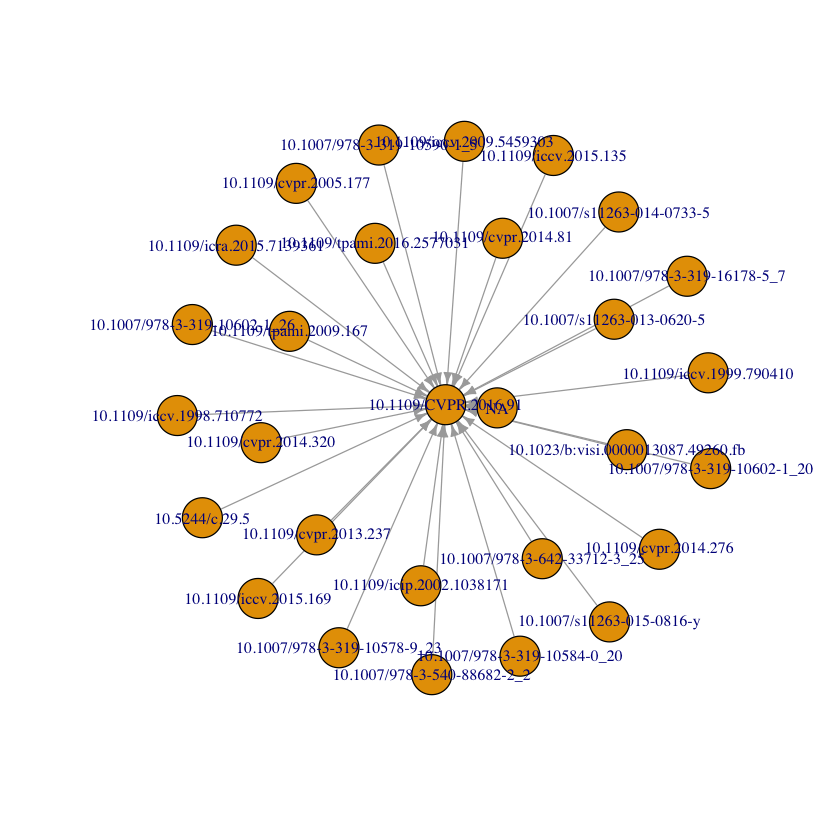

In [8]:
library(igraph)

# Extracting the DOIs from the 'display' component
citing_papers_doi <- backward_citations$display$doi

# The main paper's DOI
main_paper_doi <- "10.1109/CVPR.2016.91"

# Creating edges: Each paper in `citing_papers_doi` cites the main paper
edges <- data.frame(from = citing_papers_doi, to = main_paper_doi)

# Constructing the graph
g <- graph_from_data_frame(edges, directed = TRUE)

# Plotting the graph
plot(g, vertex.label.cex=0.8, edge.arrow.size=0.5, layout=layout_nicely)


In [10]:
library(igraph)

# Extract the DOIs from the backward_citations
cited_dois <- backward_citations$display$doi

# Create a data frame for edges
# The 'from' column will be the main paper's DOI, and the 'to' column will be the DOIs of the papers it cites
edges <- data.frame(from = rep(article_list, length(cited_dois)), to = cited_dois)

# Create an igraph object
g <- graph_from_data_frame(edges, directed = TRUE)

# Export the network to a format that Gephi can read
write_graph(g, file = "backward_citation_network.graphml", format = "graphml")

cat("Network file 'backward_citation_network.graphml' has been generated!")


Warning message in graph_from_data_frame(edges, directed = TRUE):
"In `d' `NA' elements were replaced with string "NA""


Network file 'backward_citation_network.graphml' has been generated!

In [12]:
library(igraph)

# Extract the DOIs, author names, and titles from the backward_citations
cited_dois <- backward_citations$display$doi
cited_authors <- sapply(backward_citations$display$authors, function(x) paste(x, collapse = ", "))
cited_titles <- backward_citations$display$title

# Create a data frame for edges
edges <- data.frame(from = rep(article_list, length(cited_dois)), to = cited_dois)

# Create an igraph object
g <- graph_from_data_frame(edges, directed = TRUE)

# Add vertex attributes for author names and titles
# First, for the main paper (assuming you have its author names and title)
V(g)$author <- c("Main Paper Author", cited_authors)
V(g)$title <- c("Main Paper Title", cited_titles)

# Export the network to a format that Gephi can read
write_graph(g, file = "backward_citation_network_with_metadata.graphml", format = "graphml")

cat("Network file 'backward_citation_network_with_metadata.graphml' has been generated!")


Warning message in graph_from_data_frame(edges, directed = TRUE):
"In `d' `NA' elements were replaced with string "NA""


ERROR: Error in i_set_vertex_attr(x, attr(value, "name"), index = value, value = attr(value, : Length of new attribute value must be 1 or 29, the number of target vertices, not 36


In [13]:
library(igraph)

# Extract the DOIs, author names, and titles from the backward_citations
cited_dois <- unique(backward_citations$display$doi)
cited_authors <- setNames(sapply(backward_citations$display$authors, function(x) paste(x, collapse = ", ")), backward_citations$display$doi)
cited_titles <- setNames(backward_citations$display$title, backward_citations$display$doi)

# Create a data frame for edges
edges <- data.frame(from = rep(article_list, length(cited_dois)), to = cited_dois)

# Create an igraph object
g <- graph_from_data_frame(edges, directed = TRUE)

# Add vertex attributes for author names and titles
V(g)$author <- ifelse(V(g)$name %in% names(cited_authors), cited_authors[V(g)$name], "Main Paper Author")
V(g)$title <- ifelse(V(g)$name %in% names(cited_titles), cited_titles[V(g)$name], "Main Paper Title")

# Export the network to a format that Gephi can read
write_graph(g, file = "backward_citation_network_with_metadata.graphml", format = "graphml")

cat("Network file 'backward_citation_network_with_metadata.graphml' has been generated!")


Warning message in graph_from_data_frame(edges, directed = TRUE):
"In `d' `NA' elements were replaced with string "NA""


Network file 'backward_citation_network_with_metadata.graphml' has been generated!

In [16]:
library(igraph)

# Extract the DOIs, author names, titles, years, and abstracts from the backward_citations
cited_dois <- unique(backward_citations$display$doi)
cited_authors <- setNames(sapply(backward_citations$display$authors, function(x) paste(x, collapse = ", ")), backward_citations$display$doi)
cited_titles <- setNames(backward_citations$display$title, backward_citations$display$doi)
cited_years <- setNames(backward_citations$display$year, backward_citations$display$doi)

# Create a data frame for edges
edges <- data.frame(from = rep(article_list, length(cited_dois)), to = cited_dois)

# Create an igraph object
g <- graph_from_data_frame(edges, directed = TRUE)

# Add vertex attributes for author names, titles, years, and abstracts
V(g)$author <- ifelse(V(g)$name %in% names(cited_authors), cited_authors[V(g)$name], "Main Paper Author")
V(g)$title <- ifelse(V(g)$name %in% names(cited_titles), cited_titles[V(g)$name], "Main Paper Title")
V(g)$year <- ifelse(V(g)$name %in% names(cited_years), cited_years[V(g)$name], NA) # Assign NA if year is not available

# Export the network to a format that Gephi can read
write_graph(g, file = "backward_citation_network_with_extended_metadata.graphml", format = "graphml")

cat("Network file 'backward_citation_network_with_extended_metadata.graphml' has been generated!")


Warning message in graph_from_data_frame(edges, directed = TRUE):
"In `d' `NA' elements were replaced with string "NA""


Network file 'backward_citation_network_with_extended_metadata.graphml' has been generated!

In [15]:
str(backward_citations$display)

Classes 'data.table' and 'data.frame':	35 obs. of  9 variables:
 $ authors     : chr  "Everingham, Mark; Eslami, S. M.; Van Gool, Luc; Williams, Christopher; Winn, John; Zisserman, Andrew" "Felzenszwalb, Pedro F.; Girshick, Ross; McAllester, David; Ramanan, Deva" "Szegedy, Christian; Liu, Wei; Jia, Yangqing; Sermanet, Pierre; Reed, Scott; Anguelov, Dragomir; Erhan, Dumitru;"| __truncated__ "Uijlings, Jasper; van de Sande, Koen E. A.; Gevers, Theo; Smeulders, Arnold W. M." ...
 $ year        : int  2014 2010 2014 2013 2013 NA 2015 NA 2009 2012 ...
 $ title       : chr  "The Pascal Visual Object Classes Challenge: A Retrospective" "Object Detection with Discriminatively Trained Part-Based Models" "Going Deeper with Convolutions" "Selective Search for Object Recognition" ...
 $ source_title: chr  "International Journal of Computer Vision" "IEEE transactions on pattern analysis and machine intelligence" "arXiv: Computer Vision and Pattern Recognition" "International Journal of Computer Vis

In [17]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}


# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"


ERROR: Error in as_igraph_vs(graph, edges): 'list' object cannot be coerced to type 'double'


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 4"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 3"


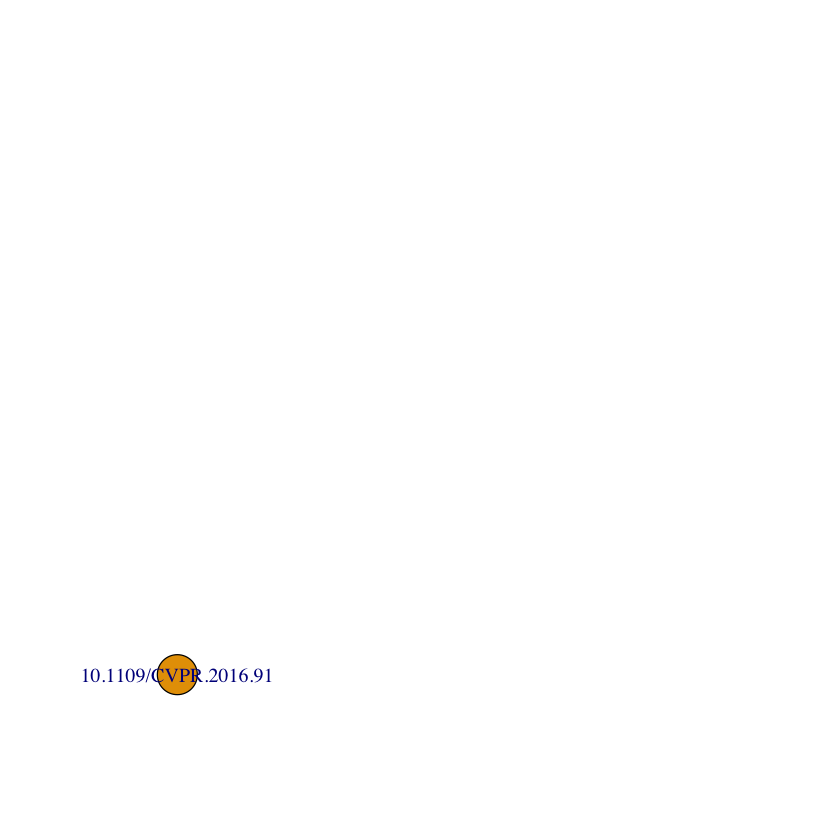

In [47]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$data$doi
  # Filter out any NULL or NA DOIs
  refs <- refs[!is.na(refs)]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
  }
}

# Now, g is your desired directed network
plot(g)


In [48]:
initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)



[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 3"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 3"
NULL


In [49]:
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  print(secondary_citations)
}


In [50]:
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)



[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 5"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 4"
 [1] "10.1007/s11263-014-0733-5"    "10.1109/tpami.2009.167"      
 [3] NA                             "10.1007/s11263-013-0620-5"   
 [5] NA                             "10.1109/icip.2002.1038171"   
 [7] "10.1007/978-3-319-10578-9_23" "10.1109/cvpr.2005.177"       
 [9] "10.1109/iccv.2009.5459303"    "10.1007/978-3-642-33712-3_25"


In [ ]:

get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


In [51]:

get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 6"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "004-193-609-931-550"
[1] "Remaining requests = 5"
[1] "Input record list:"
[1] "10.1109/tpami.2009.167"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/tpami.2009.167\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 6"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "007-316-191-175-159"
[1] "Remaining requests = 5"
[1] "Input record list:"
[1] "10.1007/s11263-013-0620-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-013-062

ERROR: Error in get_refs(doi, get_records = "references", token = token)$display: $ operator is invalid for atomic vectors


In [31]:
# Save the graph as a GraphML file
write.graph(g, file = "network_citations_of_citations.graphml", format = "graphml")


In [33]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
    
    # Now, for each of the secondary citations, fetch their backward citations (depth 2)
    tertiary_citations <- get_backward_citations(sec_cite, token)
    
    # For each tertiary citation, check if it's already in the graph
    for (ter_cite in tertiary_citations) {
      if (ter_cite %in% V(g)$name) {
        # If the tertiary citation is already in the graph, just add an edge
        g <- add_edges(g, c(sec_cite, ter_cite))
      } else {
        # If not, add the tertiary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = ter_cite)
        g <- add_edges(g, c(sec_cite, ter_cite))
      }
    }
  }
}

# Save the graph as a GraphML file
write.graph(g, file = "network_citations_citations.graphml", format = "graphml")


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"


ERROR: Error in as_igraph_vs(graph, edges): 'list' object cannot be coerced to type 'double'


In [35]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)
  # Filter out NA or NULL DOIs
  refs <- refs[!is.na(refs) & refs != ""]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Filter out any NA or NULL initial citations
initial_citations <- initial_citations[!is.na(initial_citations) & initial_citations != ""]

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
    
    # Now, for each of the secondary citations, fetch their backward citations (depth 2)
    tertiary_citations <- get_backward_citations(sec_cite, token)
    
    # For each tertiary citation, check if it's already in the graph
    for (ter_cite in tertiary_citations) {
      if (ter_cite %in% V(g)$name) {
        # If the tertiary citation is already in the graph, just add an edge
        g <- add_edges(g, c(sec_cite, ter_cite))
      } else {
        # If not, add the tertiary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = ter_cite)
        g <- add_edges(g, c(sec_cite, ter_cite))
      }
    }
  }
}

# Save the graph as a GraphML file
write.graph(g, file = "network_cc.graphml", format = "graphml")


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 8"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 7"


ERROR: Error in as_igraph_vs(graph, edges): 'list' object cannot be coerced to type 'double'


In [36]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)
  # Filter out NA or NULL DOIs
  refs <- refs[!is.na(refs) & refs != ""]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
      
      # Now, for each of the secondary citations, fetch their backward citations (depth 2)
      tertiary_citations <- get_backward_citations(sec_cite, token)
      
      # For each tertiary citation, check if it's already in the graph
      for (ter_cite in tertiary_citations) {
        if (!is.na(ter_cite) && ter_cite %in% V(g)$name) { # Check if the tertiary citation is not NA and is already in the graph
          # If the tertiary citation is already in the graph, just add an edge
          g <- add_edges(g, c(sec_cite, ter_cite))
        } else if (!is.na(ter_cite)) {
          # If not, add the tertiary citation to the graph and then add an edge
          g <- add_vertices(g, 1, name = ter_cite)
          g <- add_edges(g, c(sec_cite, ter_cite))
        }
      }
    }
  }
}

# Now, g is your desired directed network with depth 2
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"


ERROR: Error in as_igraph_vs(graph, edges): 'list' object cannot be coerced to type 'double'


In [ ]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Ensure initial_doi is a character vector
initial_doi <- as.character(initial_doi)

# Ensure initial_citations is a character vector and filter out any NAs
initial_citations <- as.character(initial_citations)
initial_citations <- initial_citations[!is.na(initial_citations)]

# Check the values before adding edges
print(initial_doi)
print(initial_citations)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


In [38]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # Add secondary citations and edges
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite)) {
        if (!(sec_cite %in% V(g)$name)) {
          g <- add_vertices(g, 1, name = sec_cite)
        }
        g <- add_edges(g, c(cite, sec_cite))
        
        # Fetch tertiary citations for each secondary citation
        tertiary_citations <- get_backward_citations(sec_cite, token)
        
        # Add tertiary citations and edges
        for (ter_cite in tertiary_citations) {
          if (!is.na(ter_cite)) {
            if (!(ter_cite %in% V(g)$name)) {
              g <- add_vertices(g, 1, name = ter_cite)
            }
            g <- add_edges(g, c(sec_cite, ter_cite))
          }
        }
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"


ERROR: Error in as_igraph_vs(graph, edges): 'list' object cannot be coerced to type 'double'


In [46]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$data$doi
  # Filter out any NULL or NA DOIs
  refs <- refs[!is.na(refs)]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
  }
}

# Now, g is your desired directed network
plot(g)

[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 0"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = "


ERROR: Error in get_refs(doi, get_records = "references", token = token)$data: $ operator is invalid for atomic vectors


In [45]:


get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)

get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 2"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 2"
 [1] "10.1007/s11263-014-0733-5"    "10.1109/tpami.2009.167"      
 [3] NA                             "10.1007/s11263-013-0620-5"   
 [5] NA                             "10.1109/icip.2002.1038171"   
 [7] "10.1007/978-3-319-10578-9_23" "10.1109/cvpr.2005.177"       
 [9] "10.1109/iccv.2009.5459303"    "10.1007/978-3-642-33712-3_25"
[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining req

ERROR: Error in 60 - t: non-numeric argument to binary operator


In [20]:
initial_citations <- get_backward_citations(initial_doi, token)
str(initial_citations)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"
List of 4
 $ display:Classes 'data.table' and 'data.frame':	35 obs. of  9 variables:
  ..$ authors     : chr [1:35] "Everingham, Mark; Eslami, S. M.; Van Gool, Luc; Williams, Christopher; Winn, John; Zisserman, Andrew" "Felzenszwalb, Pedro F.; Girshick, Ross; McAllester, David; Ramanan, Deva" "Szegedy, Christian; Liu, Wei; Jia, Yangqing; Sermanet, Pierre; Reed, Scott; Anguelov, Dragomir; Erhan, Dumitru;"| __truncated__ "Uijlings, Jasper; van de Sande, Koen E. A.; Gevers, Theo; Smeulders, Arnold W. M." ...
  ..$ year        : int [1:35] 2014 2010 2014 2013 2013 NA 2015 NA 2009 2012 ...

In [21]:
library(igraph)
library(jsonlite)

# Function to fetch citations for a given DOI
get_citations <- function(doi, token) {
  query <- sprintf('{
    "query": {
      "terms": {
        "doi": ["%s"]
      }
    },
    "size": 10
  }', doi)
  
  response <- POST("https://api.lens.org/scholarly/search", 
                   add_headers(Authorization = paste("Bearer", token)),
                   body = query)
  
  content <- content(response, "text", encoding = "UTF-8")
  parsed <- fromJSON(content, flatten = TRUE)
  
  return(parsed$data$doi)
}

# Recursive function to build the citation network
build_network <- function(doi, token, depth = 2) {
  if (depth == 0) return(NULL)
  
  citations <- get_citations(doi, token)
  edges <- list()
  
  for (citation in citations) {
    edges <- c(edges, list(c(doi, citation)))
    edges <- c(edges, build_network(citation, token, depth - 1))
  }
  
  return(edges)
}

# Define the DOI of the paper you're interested in
initial_doi <- c("10.1109/CVPR.2016.91")

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

g <- graph_from_data_frame(data.frame(from = character(0), to = character(0)), directed = TRUE)

edges <- build_network(initial_doi, token)

# Add edges to the graph
for (edge in edges) {
  g <- add_edges(g, edge)
}

# Print the graph summary
print(g)


ERROR: Error in POST("https://api.lens.org/scholarly/search", add_headers(Authorization = paste("Bearer", : could not find function "POST"


In [65]:
num_backward_citations <- length(backward_citations$display$doi)
print(num_backward_citations)


[1] 35


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 1"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 1"


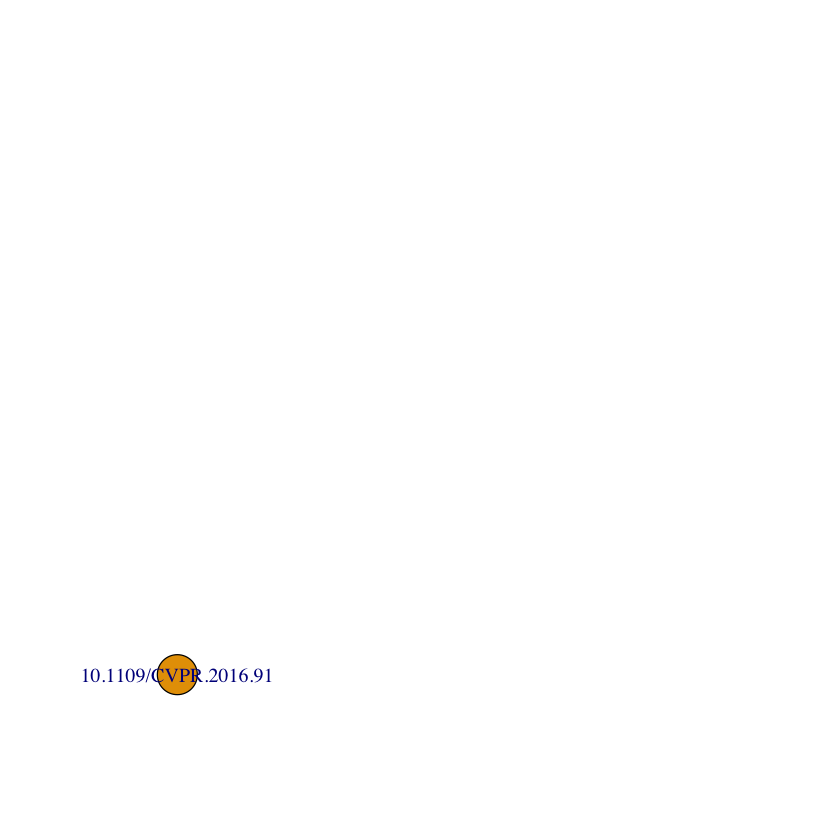

In [66]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$data$doi
  # Filter out any NULL or NA DOIs
  refs <- refs[!is.na(refs)]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
  }
}

# Now, g is your desired directed network
plot(g)


In [61]:
initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)

for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  print(secondary_citations)
}


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 1"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 0"


ERROR: Error in 60 - t: non-numeric argument to binary operator


In [62]:
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}
initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 2"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 1"
 [1] "10.1007/s11263-014-0733-5"    "10.1109/tpami.2009.167"      
 [3] NA                             "10.1007/s11263-013-0620-5"   
 [5] NA                             "10.1109/icip.2002.1038171"   
 [7] "10.1007/978-3-319-10578-9_23" "10.1109/cvpr.2005.177"       
 [9] "10.1109/iccv.2009.5459303"    "10.1007/978-3-642-33712-3_25"


In [63]:
# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 1"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "004-193-609-931-550"
[1] "Remaining requests = 0"


ERROR: Error in 60 - t: non-numeric argument to binary operator


In [64]:



get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 2"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "004-193-609-931-550"
[1] "Remaining requests = 1"
[1] "Input record list:"
[1] "10.1109/tpami.2009.167"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/tpami.2009.167\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 1"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "007-316-191-175-159"
[1] "Remaining requests = 0"


ERROR: Error in 60 - t: non-numeric argument to binary operator


In [ ]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$data$doi
  # Filter out any NULL or NA DOIs
  refs <- refs[!is.na(refs)]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
  }
}

# Now, g is your desired directed network
plot(g)


In [67]:
print(initial_citations)


NULL
